# Feature Selection - Univariate ROC AOC For Classification And MSE For Regression

## ROC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

 - True Positive Rate
 - False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
##### TPR = TP/(TP + FN)

False Positive Rate (FPR) is defined as follows:
##### FPR = FP/(FP + TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

ROC Curve showing TP Rate vs. FP Rate at different classification thresholds.

Figure 4. TP vs. FP rate at different classification thresholds.

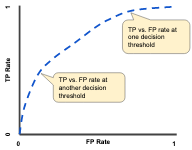

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

## AUC

AUC: Area Under the ROC Curve
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC (Area under the ROC Curve).
Figure 5. AUC (Area under the ROC Curve).

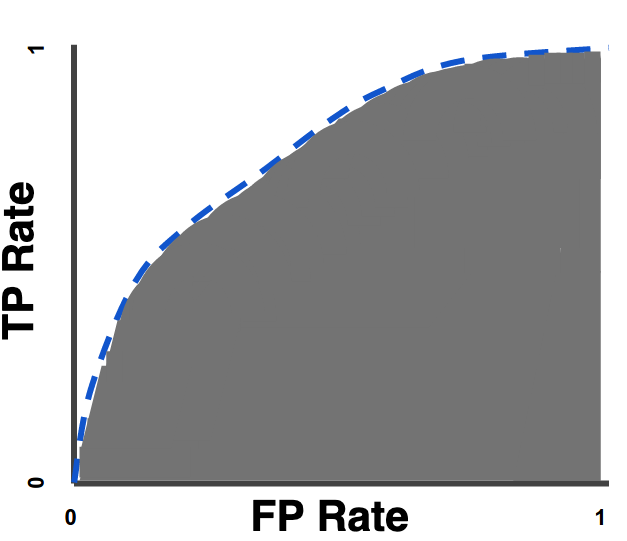

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

Download Data Files https://github.com/laxmimerit/Data-Files-for-Feature-Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# VarianceThreshold - Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv("data/santander.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
x = data.drop("TARGET", axis=1) # Features
y = data["TARGET"] # Outcome

x.shape, y.shape

((20000, 370), (20000,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 370), (4000, 370), (16000,), (4000,))

### Constant Features Removal

In [6]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [7]:
# No. of features after constants removal
constant_filter.get_support().sum()

291

In [8]:
# Returns True for all the features which are constants.
constant_list = [not temp for temp in constant_filter.get_support()] # Inversing the True to False and False to True
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [9]:
# Name of all the features which are constants
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [10]:
# removing all the constants from our Training and Test dataset.
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [11]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape

((16000, 370), (4000, 370), (16000, 291), (4000, 291))

## Quasi Constants Feature Removal

In [12]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [13]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
quasi_constant_filter.get_support().sum()

245

In [15]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [16]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape, x_train_quasi_filter.shape, x_train_quasi_filter.shape

((16000, 370),
 (4000, 370),
 (16000, 291),
 (4000, 291),
 (16000, 245),
 (16000, 245))

## Duplicate Features Removal

In [17]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [18]:
# As we can see the pandas dataframe has been transformed in to numpy array after transpose.
type(x_train_T)

numpy.ndarray

In [19]:
# Changing numpy array back to pandas dataframe
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [20]:
# Now we can see after transpose the rows has become columns and columns has become rows.
x_train_T.shape, x_test_T.shape

((245, 16000), (245, 4000))

In [21]:
# Getting duplicate features count
x_train_T.duplicated().sum()

18

In [22]:
duplicated_features = x_train_T.duplicated()
duplicated_features

# True is duplicated and False is non duplicated rows.

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [23]:
# Removing duppicated features.
# After this the False becomes True and True becomes false.

# Inversing the True to False and False to True
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [24]:
# Final dataset after removing constants, quasi constants and duplicates.

# Transposing again to original form
x_train_unique = x_train_T[features_to_keep].T 

# Transposing again to original form
x_test_unique = x_test_T[features_to_keep].T

In [25]:
x_train.shape, x_test.shape, x_train_unique.shape, x_test_unique.shape

((16000, 370), (4000, 370), (16000, 227), (4000, 227))

## Build Model and Compare the Performance after and before removal.

In [26]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

In [27]:
%%time
# Run on final data.
run_random_forest(x_train_unique, x_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 6.5 s, sys: 105 ms, total: 6.61 s
Wall time: 2.09 s


In [28]:
%%time
# Run on original data.
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.86 s, sys: 144 ms, total: 8 s
Wall time: 2.36 s


As we can see the accuracy and time taken is less after removing the constants, quasi constants and duplicates compare to the original data. 

What we can say here is that removing constants, quasi constants and duplicates doesn't depricates the accuracy it rather improves it.

## Calculate ROC_AUC Score

In [31]:
roc_auc = []
for feature in x_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(x_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [32]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [35]:
roc_values = pd.Series(roc_auc)
roc_values.index = x_train_unique.columns
roc_values.sort_values(ascending=False, inplace=True)

In [36]:
# If features roc_aoc value is 0.5 that means these featrures are not giving any information to predict output. 
# So any features which is 0.5 or less are not providing any values and we can remove it.
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

<AxesSubplot:>

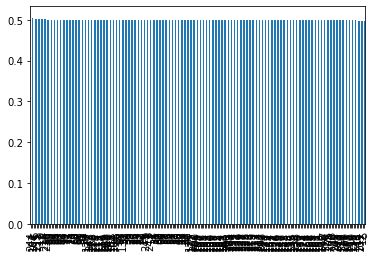

In [37]:
roc_values.plot.bar()

In [38]:
sel = roc_values[roc_values > 0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [39]:
x_train_roc = x_train_unique[sel.index]
x_test_roc = x_test_unique[sel.index]

In [40]:
%%time
run_random_forest(x_train_roc, x_test_roc, y_train, y_test)

Accuracy on test set: 
0.95275
CPU times: user 3.99 s, sys: 83 ms, total: 4.08 s
Wall time: 1.53 s


In [41]:
x_train_roc.shape

(16000, 11)

In [42]:
%%time
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.64 s, sys: 202 ms, total: 7.85 s
Wall time: 2.7 s


## Feature Selection using RMSE in Regression

In [49]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
boston = load_boston()

In [45]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
x = pd.DataFrame(data = boston.data, columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
y = boston.target

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [53]:
mse = []
for feature in x_train.columns:
    clf = LinearRegression()
    clf.fit(x_train[feature].to_frame(), y_train)
    y_pred = clf.predict(x_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [54]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.90735162739531,
 80.3915476111525,
 82.61874125667717,
 82.46499985731933,
 78.30831374720844,
 81.79497121208001,
 77.75285601192718,
 46.336305360025925]

In [55]:
# Higher the MSE more the error is, so we select the features with lower mse values.
mse = pd.Series(mse, index=x_train.columns)
mse.sort_values(ascending=False, inplace=True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

<AxesSubplot:>

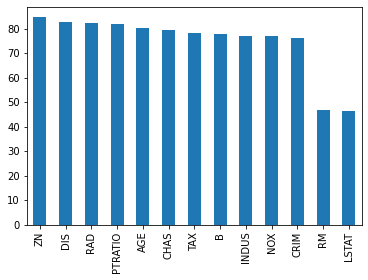

In [56]:
mse.plot.bar()

In [60]:
x_train_mse = x_train[["RM", "LSTAT"]]
x_test_mse = x_test[["RM", "LSTAT"]]

In [61]:
# After RMSE dataset
%%time
model = LinearRegression()
model.fit(x_train_mse, y_train)
y_pred = model.predict(x_test_mse)
print("r2_core: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Std: ", np.std(y))

# Since RMSE is lesser that the STD its a good model.

r2_core:  0.5409084827186418
RMSE:  6.114172522817781
Std:  9.188011545278203
CPU times: user 14.8 ms, sys: 1.92 ms, total: 16.7 ms
Wall time: 15.4 ms


In [62]:
# Original dataset
%%time
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("r2_core: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Std: ", np.std(y))

r2_core:  0.5892223849182504
RMSE:  5.783509315085138
Std:  9.188011545278203
CPU times: user 20.4 ms, sys: 5.05 ms, total: 25.4 ms
Wall time: 21.9 ms
